In [1]:
import jieba # 分词软件
import re #normalization 
import copy 

from sklearn.preprocessing import LabelEncoder

import numpy as np

from collections import OrderedDict

## Data Cleaning

In [6]:
with open('data/hongloumeng.txt', encoding='utf-8', mode = 'r') as f:
    i=0
    for line in f:
        print (line)
        i+=1
        if i>10:
            break

《红楼梦》曹雪芹



严正声明：本书为丫丫小说网(www.shuyaya.com)的用户上传至其在本站的存储空间，本站只提供TXT全集电子书存储服务以及免费下载服务，以下作品内容之版权与本站无任何关系。

在线阅读：http://www.shuyaya.com/read/2034/

--------------------------------------------------



第一回  甄士隐梦幻识通灵　贾雨村风尘怀闺秀



    		



    此开卷第一回也．作者自云：因曾历过一番梦幻之后，故将真事隐去，而借"通灵"之说，撰此《石头记》一书也．故曰"甄士隐"云云．但书中所记何事何人？自又云：“今风尘碌碌，一事无成，忽念及当日所有之女子，一一细考较去，觉其行止见识，皆出于我之上．何我堂堂须眉，诚不若彼裙钗哉？实愧则有余，悔又无益之大无可如何之日也！当此，则自欲将已往所赖天恩祖德，锦衣纨绔之时，饫甘餍肥之日，背父兄教育之恩，负师友规谈之德，以至今日一技无成，半生潦倒之罪，编述一集，以告天下人：我之罪固不免，然闺阁中本自历历有人，万不可因我之不肖，自护己短，一并使其泯灭也．虽今日之茅椽蓬牖，瓦灶绳床，其晨夕风露，阶柳庭花，亦未有妨我之襟怀笔墨者．虽我未学，下笔无文，又何妨用假语村言，敷演出一段故事来，亦可使闺阁昭传，复可悦世之目，破人愁闷，不亦宜乎？"故曰"贾雨村"云云．



In [15]:
def cut_sentence(text):  #cut sentences by punctuations
    start = 0
    i = 0
    sentences = []

    #punt_list = ',.!?:;~，。！？：；～'
    #punt_list = ',.!?:;~，．。！？：；～'
    punt_list = '.!?~． 。！？～\n'
    for word in text:
        if word in punt_list and token not in punt_list: #检查标点符号下一个字符是否还是标点
            sentences.append(text[start:i+1])
            start = i+1
            i += 1
        else:
            i += 1
            token = list(text[start:i+2]).pop() # 取下一个字符
    if start < len(text):
        sentences.append(text[start:])
    return sentences

In [16]:
f=open('data/hongloumeng.txt', encoding='utf-8', mode = 'r')
context=f.read()
sentences=cut_sentence(context)
f.close

<function TextIOWrapper.close>

In [18]:
for s in sentences[:10]:
    print (s)

《红楼梦》曹雪芹


严正声明：本书为丫丫小说网(www.
shuyaya.
com)的用户上传至其在本站的存储空间，本站只提供TXT全集电子书存储服务以及免费下载服务，以下作品内容之版权与本站无任何关系。

在线阅读：http://www.
shuyaya.
com/read/2034/

--------------------------------------------------


第一回  
甄士隐梦幻识通灵　贾雨村风尘怀闺秀

    


In [20]:
filter_re = re.compile(u'[^\u4E00-\u9FA5]') # all chinese characters' encoding range

In [24]:
f=open('data/cleaned_hongloumeng.txt', encoding='utf-8', mode = 'w') #created a new writable/editable doc called "cleaned_hongloumeng.txt'
for s in sentences:
    cleaned_s=filter_re.sub(r'',s) # substitute all non-chinese characters in sentences
    if len(cleaned_s):
        f.write(cleaned_s+'\n')
f.close()

### Now all punctuations and english characters have been removed; Only Chinese characters have been kept

In [28]:
# put all chinese sentences into a list
cleaned_sentences = []
for s in sentences:
    cleaned_s = filter_re.sub(r'', s)
    if len(cleaned_s) :
        cleaned_sentences.append(cleaned_s)

In [29]:
cleaned_sentences[:20]

['红楼梦曹雪芹',
 '严正声明本书为丫丫小说网',
 '的用户上传至其在本站的存储空间本站只提供全集电子书存储服务以及免费下载服务以下作品内容之版权与本站无任何关系',
 '在线阅读',
 '第一回',
 '甄士隐梦幻识通灵贾雨村风尘怀闺秀',
 '此开卷第一回也',
 '作者自云因曾历过一番梦幻之后故将真事隐去而借通灵之说撰此石头记一书也',
 '故曰甄士隐云云',
 '但书中所记何事何人',
 '自又云今风尘碌碌一事无成忽念及当日所有之女子一一细考较去觉其行止见识皆出于我之上',
 '何我堂堂须眉诚不若彼裙钗哉',
 '实愧则有余悔又无益之大无可如何之日也',
 '当此则自欲将已往所赖天恩祖德锦衣纨绔之时饫甘餍肥之日背父兄教育之恩负师友规谈之德以至今日一技无成半生潦倒之罪编述一集以告天下人我之罪固不免然闺阁中本自历历有人万不可因我之不肖自护己短一并使其泯灭也',
 '虽今日之茅椽蓬牖瓦灶绳床其晨夕风露阶柳庭花亦未有妨我之襟怀笔墨者',
 '虽我未学下笔无文又何妨用假语村言敷演出一段故事来亦可使闺阁昭传复可悦世之目破人愁闷不亦宜乎',
 '故曰贾雨村云云',
 '此回中凡用梦用幻等字是提醒阅者眼目亦是此书立意本旨',
 '列位看官你道此书从何而来',
 '说起根由虽近荒唐细按则深有趣味']

### Use jieba.cut() to cut sentence to phrase

In [31]:
# an example:
for s in jieba.cut('说起根由虽近荒唐细按则深有趣味'):
    print (s)

说起
根由
虽近
荒唐
细
按
则
深有
趣味


In [32]:
type(jieba.cut('说起根由虽近荒唐细按则深有趣味'))

generator

In [33]:
print (jieba.cut('说起根由虽近荒唐细按则深有趣味'))

<generator object Tokenizer.cut at 0x0000013A6187AA40>


In [35]:
print (list(jieba.cut('说起根由虽近荒唐细按则深有趣味')))

['说起', '根由', '虽近', '荒唐', '细', '按', '则', '深有', '趣味']


In [36]:
# Just like above, do the similar for all sentences in cleaned_sentences
cut_sentences = [list(jieba.cut(s)) for s in cleaned_sentences]
print (cut_sentences[0])

['红楼梦', '曹雪芹']


In [61]:
cut_sentences[0:10]

[['红楼梦', '曹雪芹'],
 ['严正声明', '本书', '为', '丫丫', '小说网'],
 ['的',
  '用户',
  '上传',
  '至',
  '其',
  '在',
  '本站',
  '的',
  '存储空间',
  '本站',
  '只',
  '提供',
  '全集',
  '电子书',
  '存储',
  '服务',
  '以及',
  '免费',
  '下载',
  '服务',
  '以下',
  '作品',
  '内容',
  '之',
  '版权',
  '与',
  '本站',
  '无',
  '任何',
  '关系'],
 ['在线', '阅读'],
 ['第一回'],
 ['甄士隐', '梦幻', '识通灵', '贾雨村', '风尘', '怀', '闺秀'],
 ['此', '开卷', '第一回', '也'],
 ['作者',
  '自云因',
  '曾',
  '历过',
  '一番',
  '梦幻',
  '之后',
  '故',
  '将',
  '真事',
  '隐去',
  '而',
  '借',
  '通灵之',
  '说',
  '撰此',
  '石头记',
  '一书',
  '也'],
 ['故曰', '甄士隐', '云云'],
 ['但书中', '所记', '何事', '何人']]

## Language Model: n-grams

In [39]:
generate_ngrams = lambda sentence, n : zip(*[sentence[i:] for i in range(n)]) # set up a function to generate n-grams language model
# note: n in above argument --> n-gram (i.e. n=1, unigram; n=2, bigram; n=3, trigram)

In [50]:
for unigram in generate_ngrams(cut_sentences[10], 1):
    print (unigram[0])

自
又
云今
风尘碌碌
一事无成
忽
念及
当日
所有
之
女子
一一
细考
较
去
觉
其
行止
见识
皆
出于
我
之上


In [49]:
# test generate_ngrams function
for bigram in generate_ngrams(cut_sentences[10], 2):
    print (bigram[0], bigram[1])


自 又
又 云今
云今 风尘碌碌
风尘碌碌 一事无成
一事无成 忽
忽 念及
念及 当日
当日 所有
所有 之
之 女子
女子 一一
一一 细考
细考 较
较 去
去 觉
觉 其
其 行止
行止 见识
见识 皆
皆 出于
出于 我
我 之上


In [58]:
for trigram in generate_ngrams(cut_sentences[10], 3):
    print (trigram[0],trigram[1],trigram[2])

自 又 云今
又 云今 风尘碌碌
云今 风尘碌碌 一事无成
风尘碌碌 一事无成 忽
一事无成 忽 念及
忽 念及 当日
念及 当日 所有
当日 所有 之
所有 之 女子
之 女子 一一
女子 一一 细考
一一 细考 较
细考 较 去
较 去 觉
去 觉 其
觉 其 行止
其 行止 见识
行止 见识 皆
见识 皆 出于
皆 出于 我
出于 我 之上


## Maximum Likehood Parameter Estimation
After setting-up n-gram model, next step is to calculate maximum likelihood parameter estimation (PDF P22, 21)

In [60]:
# maximum likelihood parameter estimation 
def ngrams_parameter_estimate(sentences, n):
    sentences_copy = copy.deepcopy(sentences)
    ngrams_dict = {}
    num_ngrams = 0
    for words in sentences_copy:
        for i in range(n-1):
            words.insert(0, '*')  # add "*" at beginning of each cutted sentence
        words.append('#')  # add stop sign "#" at end of each cutted sentence
        ngrams = generate_ngrams(words, n) # sub those to pre-defined n-gram language model above
        for ngram in ngrams:
            ngrams_dict[ngram] = ngrams_dict.get(ngram, 0.0) + 1.0  # form a dictionary with key=word, value=frequency
            num_ngrams += 1  # count total # of unique word appeared
    
    # normalize (optional)
    #for ngram in ngrams_dict:
        #ngrams_dict[ngram] /= num_ngrams
        
    return ngrams_dict, num_ngrams

In [64]:
# for example: unigram
unigrams_dict, n_unigrams = ngrams_parameter_estimate(cut_sentences, 1)

In [77]:
for k, v in unigrams_dict.items():
    print ("k: ",k)
    print ("v: ",v)
    i+=1
    if i>20:
        break

k:  ('红楼梦',)
v:  9.0
k:  ('曹雪芹',)
v:  5.0
k:  ('#',)
v:  34412.0
k:  ('严正声明',)
v:  1.0
k:  ('本书',)
v:  7.0
k:  ('为',)
v:  529.0
k:  ('丫丫',)
v:  1.0
k:  ('小说网',)
v:  1.0
k:  ('的',)
v:  14115.0


In [72]:
def fx(k,v):
    return (v,k)

In [81]:
# sort by frequency of word, create a sorted_dictionary with key=(word,), value=frequency where frequency>=10 (note: we
ignored words with frequency<10, i.e. v<10 as below)
filtered_unigrams_dict = OrderedDict(sorted([(k, v) for k, v in unigrams_dict.items() if v >= 10], key = lambda x: x[1], reverse=True))

- PLEASE NOTE: In Python 3, dictionaries (including OrderedDict) return "view" objects from their keys() and values() methods. Those are iterable, but don't support indexing. 
- To refer to position of the list of .key() or .value(), e.g. .keys()[0] (the first key in dictionary), you need to make list() of .keys() then refer to the position by indexing, e.g. list(dict.keys())[0]

In [91]:
listofkey=list(filtered_unigrams_dict.keys())

In [93]:
print(listofkey[0])  #the word of key in first position(highest frequency)
print(filtered_unigrams_dict[listofkey[0]]) #its frequency

('#',)
34412.0


In [92]:
print ('word: %s, frequency: %s' % (listofkey[0][0], filtered_unigrams_dict[listofkey[0]])) # highest frequency
print ('word: %s, frequency: %s' % (listofkey[1][0], filtered_unigrams_dict[listofkey[1]])) # 2nd highest frequency
print ('word: %s, frequency: %s' % (listofkey[200][0], filtered_unigrams_dict[listofkey[200]])) # 201 highest frequency
print ('word: %s, frequency: %s' % (listofkey[-1][0], filtered_unigrams_dict[listofkey[-1]])) # the least frequency

word: #, frequency: 34412.0
word: 了, frequency: 19613.0
word: 今儿, frequency: 286.0
word: 查抄, frequency: 10.0


visualization

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

- PLEASE NOTE: similar like .keys(), dict.values() in python 3 still needs list() to actually use it instead of viewing it (see below list(filtered_unigrams_dict.values()) [note: np.log10(filtered_unigrams_dict.values()) won't work, it only worked in python 2, I added a list() to make it work in python 3]

[Text(0,0.5,'frequency'), Text(0.5,0,'log(word frequency)')]

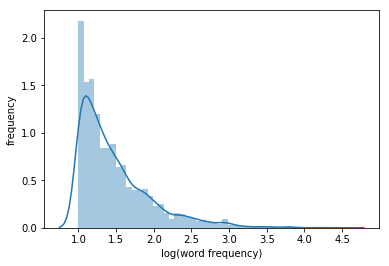

In [107]:
ax = sns.distplot(np.log10(list(filtered_unigrams_dict.values())))
ax.set(xlabel='log(word frequency)', ylabel='frequency')

## Evaluate Language Model with Perplexity(迷惑度) with train/test dataset

- see PDF P 23

### Split Data into Train, Valid, Test

In [108]:
n_samples = len(cut_sentences)
n_valid = int(n_samples * 0.2)
n_test = int(n_samples * 0.3)

In [109]:
permutation = np.random.permutation(n_samples)

In [110]:
shuffled_sentences = np.array(cut_sentences)[permutation]

In [111]:
train = shuffled_sentences[:n_samples-n_test-n_valid]
valid = shuffled_sentences[n_samples-n_test-n_valid:n_samples-n_test]
test = shuffled_sentences[n_samples-n_test:]

### Build Language Model on Training dataset

In [112]:
unigram_dict, n_unigrams = ngrams_parameter_estimate(train, 1)
bigrams_dict, n_bigrams = ngrams_parameter_estimate(train, 2)
trigrams_dict, n_trigrams = ngrams_parameter_estimate(train, 3)

In [113]:
n_unigrams

242714

In [114]:
n_bigrams

242714

In [115]:
n_trigrams

242714

- why same amount of # grams among the above three? -- Because I have added a "*" and "#" sign for each cutted sentences

### Test Our Uni-, Bi-, Tri-gram Model on Testing dataset

#### 1. Testing using general log probability to calculate perplexity (PDF P23-25)

In [127]:
def calculate_sentence_log_probability(sentence, n, num_grams, ngrams_dict, n_1grams_dict=None): #log probability (PDF P23)
    assert len(list(ngrams_dict.keys())[0])== n, n
    if n_1grams_dict is None:
        assert n == 1
    ngrams = generate_ngrams(sentence, n)
    log_prob, has_unknown_ngram = 0.0, False
    for ngram in ngrams:
        if ngram in ngrams_dict:
            if n == 1:
                log_prob += np.log2(ngrams_dict[ngram]/num_grams)
            else:
                log_prob += np.log2(ngrams_dict[ngram]/n_1grams_dict[ngram[:n-1]])
        else:
            has_unknown_ngram = True
    return 0.0 if has_unknown_ngram else log_prob

In [128]:
def compute_total_words(sentences):
    
    return np.sum([len(s) for s in sentences])

In [129]:
n_words_in_test = compute_total_words(test)
n_words_in_test

134818

In [130]:
# calculate perplexity for n-grams model using testing set: (PDF P 23)
ngrams_list = [unigram_dict, bigrams_dict, trigrams_dict]
ngrams_names = ['uni', 'bi', 'tri']
print ("Number of words in test: {}".format(n_words_in_test))
for n in range(1, 4):
    sum_log_prob = 0.0
    for s in test:
        if n == 1:
            sum_log_prob += calculate_sentence_log_probability(s, n, n_unigrams, ngrams_list[n-1])
        else:
            sum_log_prob += calculate_sentence_log_probability(s, n, n_unigrams, ngrams_list[n-1], ngrams_list[n-2])
    perplexity = 2**(-sum_log_prob/n_words_in_test)
    
    print ("Perplexity for {} gram language model: {}".format(ngrams_names[n-1], perplexity))

Number of words in test: 134818
Perplexity for uni gram language model: 15.243750590959857
Perplexity for bi gram language model: 1.0866422336263726
Perplexity for tri gram language model: 1.0068247873077378


#### Conclusion for above: perplexity smaller means language is better(PDF P24)--> we can see unigram is the worst; bi-gram and trigram are both good. 

In [ ]:
# same testing using validation dataset, same as above, so we can skip for now...
n_words_in_valid = compute_total_words(valid)
print "Number of words in valid: {}".format(n_words_in_valid)
for n in range(1, 4):
    sum_log_prob = 0.0
    for s in valid:
        if n == 1:
            sum_log_prob += calculate_sentence_log_probability(s, n, n_unigrams, ngrams_list[n-1])
        else:
            sum_log_prob += calculate_sentence_log_probability(s, n, n_unigrams, ngrams_list[n-1], ngrams_list[n-2])
    perplexity = 2**(-sum_log_prob/n_words_in_valid)
    
    print "Perplexity for {} gram language model: {}".format(ngrams_names[n-1], perplexity)

#### 2. Testing using log probability w/ Linear Interpolation Smoothing to calculate perplexity (PDF P26-27)

In [147]:
def sentence_log_probability_with_linear_interpolation(sentence, num_grams, ngrams_list, lambdas):
    ngrams = generate_ngrams(sentence, 3)
    log_prob, has_unknown_ngram = 0.0, False
    for ngram in ngrams:
        if ngram in ngrams_list[2]:
            prob = 0.0
            for i in range(3):
                if i == 0:
                    prob += ngrams_list[i][ngram[:i+1]]*lambdas[i]/num_grams
                else:
                    prob += ngrams_list[i][ngram[:i+1]]*lambdas[i]/ngrams_list[i-1][ngram[:i]]
            log_prob += np.log2(prob) if prob > 0.0 else 0.0
        else:
            has_unknown_ngram = True
    return 0.0 if has_unknown_ngram else log_prob

 - Find best lambdas combination below to Maximize Weighted Sum of Log Probability w/ Linear Interpolation Smoothing (Equation L(...)=... on PDF P 27) 

In [148]:
def random_search_lambdas(sentences, n_iter, n_unigrams, ngrams_list, verbose=True):
    best_lambda_1, best_lambda_2, best_lambda_3 = None, None, None
    best_log_prob = -np.inf
    for i in range(n_iter):
        lambda_1 = np.random.uniform(0, 1)
        lambda_2 = np.random.uniform(0, 1-lambda_1)
        lambda_3 = 1.0 - lambda_1 - lambda_2        # All three lambdas must be >0
        lambdas = [lambda_1, lambda_2, lambda_3]
        sum_log_prob = 0.0
        for s in valid:
            sum_log_prob += sentence_log_probability_with_linear_interpolation(s, n_unigrams, ngrams_list, lambdas)
        if sum_log_prob > best_log_prob:
            best_log_prob = sum_log_prob
            best_lambda_1, best_lambda_2, best_lambda_3 = tuple(lambdas)
        if verbose:
            print ("current best log_prob: {}".format(best_log_prob))
            
    return [best_lambda_1, best_lambda_2, best_lambda_3]

In [149]:
best_lambdas = random_search_lambdas(valid, 10, n_unigrams, ngrams_list)

current best log_prob: -1321.9976076970513
current best log_prob: -1178.2458477273863
current best log_prob: -1178.2458477273863
current best log_prob: -1178.2458477273863
current best log_prob: -835.9468839964425
current best log_prob: -835.9468839964425
current best log_prob: -835.9468839964425
current best log_prob: -835.9468839964425
current best log_prob: -835.9468839964425
current best log_prob: -835.9468839964425


In [150]:
best_lambdas

[0.03449309798939648, 0.45996695823350303, 0.5055399437771004]

In [151]:
# use best_lambdas to recalculate perplexity
n_words_in_valid = compute_total_words(valid)
lambdas = best_lambdas
print ("Number of words in valid: {}".format(n_words_in_valid))
sum_log_prob = 0.0
for s in valid:
    sum_log_prob += sentence_log_probability_with_linear_interpolation(s, n_unigrams, ngrams_list, lambdas)
perplexity = 2**(-sum_log_prob/n_words_in_valid)
    
print ("Perplexity for smoothed trigram language model: {}".format(perplexity))

Number of words in valid: 89866
Perplexity for smoothed trigram language model: 1.0064685895992813


#### Conclusion for method above with linear interpolation smoothing--> compared trigram model perplexity between this smoothing method (1.0064685895992813) and general method(without smoothing, 1.0068247873077378), we found results was improved a little bit.

#### 3. Testing using log probability w/ Laplace Smoothing to calculate perplexity (PDF P28)- homework